In [1]:
%cd /content/drive/MyDrive/Cursuri/Business Analyst/Business Analyst course/Predictive Analytics/Prophet

/content/drive/MyDrive/Cursuri/Business Analyst/Business Analyst course/Predictive Analytics/Prophet


In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
df = pd.read_csv("Udemy_wikipedia_visits.csv")
df.head()

,Date,Udemy,Easter,Christmas,Black Friday
0,1/1/2016,311,0,0,0
1,1/2/2016,564,0,0,0
2,1/3/2016,517,0,0,0
3,1/4/2016,652,0,0,0
4,1/5/2016,756,0,0,0


In [4]:
#Looking kind of variables there are in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1827 non-null   object
 1   Udemy         1827 non-null   int64 
 2   Easter        1827 non-null   int64 
 3   Christmas     1827 non-null   int64 
 4   Black Friday  1827 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.5+ KB


In [6]:
#Summary Statistics
df.describe()

,Udemy,Easter,Christmas,Black Friday
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,943.068418,0.002737,0.002737,0.002737
std,531.341700,0.052256,0.052256,0.052256
min,209.000000,0.000000,0.000000,0.000000
25%,542.500000,0.000000,0.000000,0.000000
50%,832.000000,0.000000,0.000000,0.000000
75%,1175.000000,0.000000,0.000000,0.000000
max,2847.000000,1.000000,1.000000,1.000000


<Axes: >

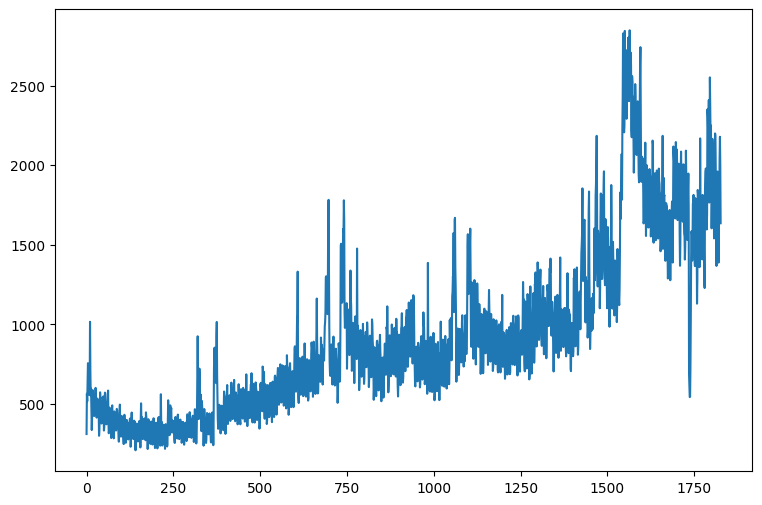

In [7]:
#Plotting
df.Udemy.plot(figsize = (9,6))

#Data Preparation

In [9]:
#Date Variable %m%d%Y -> %Y-%m-%d
df.Date = pd.to_datetime(df.Date,
                         format = "%m/%d/%Y")
df.Date

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1822   2020-12-27
1823   2020-12-28
1824   2020-12-29
1825   2020-12-30
1826   2020-12-31
Name: Date, Length: 1827, dtype: datetime64[ns]

In [10]:
#Change variable: Date -> ds, time-series(Udemy) -> y
df = df.rename(columns = {
      "Date": "ds",
      "Udemy": "y"
})
df.head(1)

,ds,y,Easter,Christmas,Black Friday
0,2016-01-01,311,0,0,0


#Holidays

In [14]:
#Easter
easter_dates = df[df.Easter == 1].ds
easter_dates

86     2016-03-27
471    2017-04-16
821    2018-04-01
1206   2019-04-21
1563   2020-04-12
Name: ds, dtype: datetime64[ns]

In [17]:
easter = pd.DataFrame({'holiday': 'easter',
                      'ds': easter_dates,
                      'lower_window': -5,
                      'upper_window': 2})

In [18]:
easter.head()

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2


In [20]:
#Black Friday
bf_dates = pd.to_datetime(df[df['Black Friday'] == 1].ds)

In [21]:
bf_dates

329    2016-11-25
693    2017-11-24
1057   2018-11-23
1428   2019-11-29
1792   2020-11-27
Name: ds, dtype: datetime64[ns]

In [22]:
bf = pd.DataFrame({'holiday' : 'black friday',
                  'ds': bf_dates,
                   'lower_window': -7,
                   'upper_window': 5})

In [25]:
#Combine the holidays
holidays = pd.concat([easter, bf])
holidays

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2
329,black friday,2016-11-25,-7,5
693,black friday,2017-11-24,-7,5
1057,black friday,2018-11-23,-7,5
1428,black friday,2019-11-29,-7,5
1792,black friday,2020-11-27,-7,5


In [26]:
#Remove holidays from the main df
df = df.drop(columns = ["Easter", "Black Friday"])
df.head(0)

,ds,y,Christmas


#Prophet Model

In [28]:
#Training & Test Split
test_days = 31
training = df.iloc[:-test_days, :]
test = df.iloc[-test_days:, :]
print(test.head(1))
print(training.tail(1))

             ds     y  Christmas
1796 2020-12-01  2393          0
             ds     y  Christmas
1795 2020-11-30  2551          0


In [48]:
#Prophet Model
m = Prophet(growth = 'linear',
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = 'additive',
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)

In [49]:
m.add_regressor('Christmas')
m.fit(training)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf03kzt10/onojkj6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf03kzt10/2auxwvmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46059', 'data', 'file=/tmp/tmpf03kzt10/onojkj6z.json', 'init=/tmp/tmpf03kzt10/2auxwvmj.json', 'output', 'file=/tmp/tmpf03kzt10/prophet_modelis08yp6q/prophet_model-20230714095116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
#Regressor Coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,additive,0.0,-268.186831,-268.186831,-268.186831


In [51]:
#When is Christmas, the visits drop with coef number

#Forecasting

In [52]:
#Create future df
future = m.make_future_dataframe(periods = test_days,
                                 freq = 'D')
future = pd.concat([future, df.iloc[:, 2:]],
                   axis = 1)

In [53]:
future.head()

,ds,Christmas
0,2016-01-01,0
1,2016-01-02,0
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0


In [54]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,311.806287,181.899365,692.059800,311.806287,311.806287,0.0,0.0,0.0,123.405848,...,-22.261446,-22.261446,-22.261446,145.667294,145.667294,145.667294,0.0,0.0,0.0,435.212135
1,2016-01-02,312.139765,31.414742,549.558562,312.139765,312.139765,0.0,0.0,0.0,-11.290050,...,-180.747244,-180.747244,-180.747244,169.457195,169.457195,169.457195,0.0,0.0,0.0,300.849716
2,2016-01-03,312.473243,119.421976,608.306418,312.473243,312.473243,0.0,0.0,0.0,51.955193,...,-140.081369,-140.081369,-140.081369,192.036562,192.036562,192.036562,0.0,0.0,0.0,364.428436
3,2016-01-04,312.806721,368.650935,852.910565,312.806721,312.806721,0.0,0.0,0.0,288.626346,...,75.578503,75.578503,75.578503,213.047842,213.047842,213.047842,0.0,0.0,0.0,601.433067
4,2016-01-05,313.140199,405.705527,889.840106,313.140199,313.140199,0.0,0.0,0.0,334.392970,...,102.232010,102.232010,102.232010,232.160960,232.160960,232.160960,0.0,0.0,0.0,647.533169


In [55]:
#Key Columns: ds, trend, yhat(last column) -> actual prediction

In [56]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'black friday',
       'black friday_lower', 'black friday_upper', 'easter', 'easter_lower',
       'easter_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower', 'extra_regressors_additive_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [60]:
#Holiday Assessmnet
holiday = 'easter'
forecast[(forecast[holiday].abs() > 0) & (forecast['ds'] > '2020-01-01')][['ds', holiday]]

,ds,easter
1558,2020-04-07,-20.017371
1559,2020-04-08,-36.045867
1560,2020-04-09,3.830809
1561,2020-04-10,28.914986
1562,2020-04-11,76.213051
1563,2020-04-12,86.758055
1564,2020-04-13,84.724442
1565,2020-04-14,28.186069


In [61]:
#5 days pre-ester & 2 days post-easter => record nr. 1563 is the easter

In [62]:
holiday = 'black friday'
forecast[(forecast[holiday].abs() > 0) & (forecast['ds'] > '2020-01-01')][['ds', holiday]]

,ds,black friday
1785,2020-11-20,98.061783
1786,2020-11-21,90.031250
1787,2020-11-22,163.136801
1788,2020-11-23,235.288607
1789,2020-11-24,212.685135
1790,2020-11-25,184.304816
1791,2020-11-26,222.791416
1792,2020-11-27,452.433852
1793,2020-11-28,201.912087
1794,2020-11-29,225.637562


In [64]:
holiday = 'Christmas'
forecast[(forecast[holiday].abs() > 0) & (forecast['ds'] > '2020-01-01')][['ds', holiday]]

,ds,Christmas
1820,2020-12-25,-268.186831


In [68]:
#Retrieve the predictions
predictions = forecast.yhat[-test_days:]

In [69]:
#Accuracy Assessmnet
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(test.y, predictions)

200.3321357500199

In [71]:
np.sqrt(mean_squared_error(test.y, predictions))

249.82407255911065

In [72]:
#Average absolute error (to be communicated) = 200.33
#Mean Squared error -> more clear when we work with  tuning

#Visualization

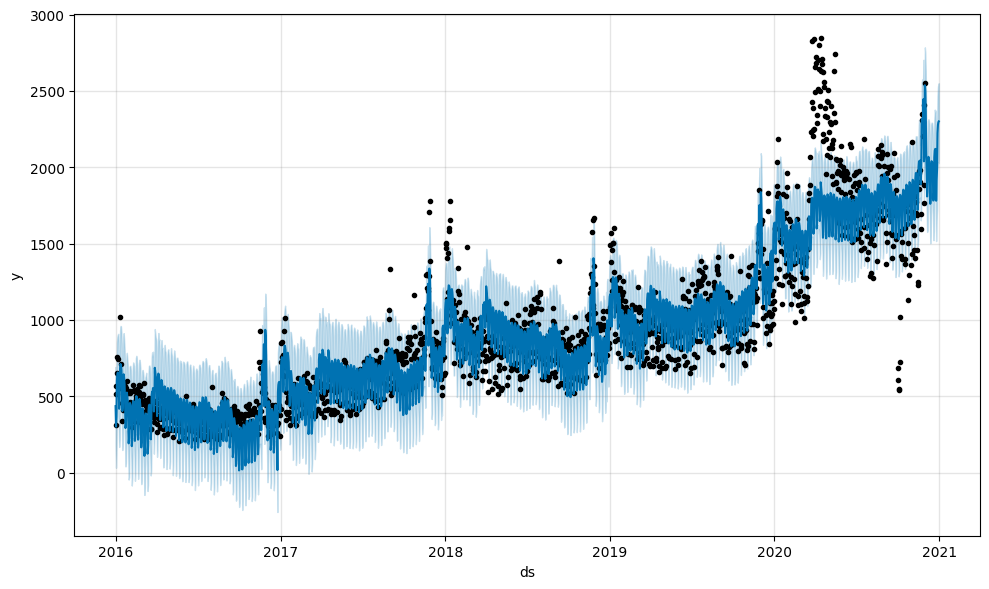

In [74]:
#Visualize the forecast
m.plot(forecast);

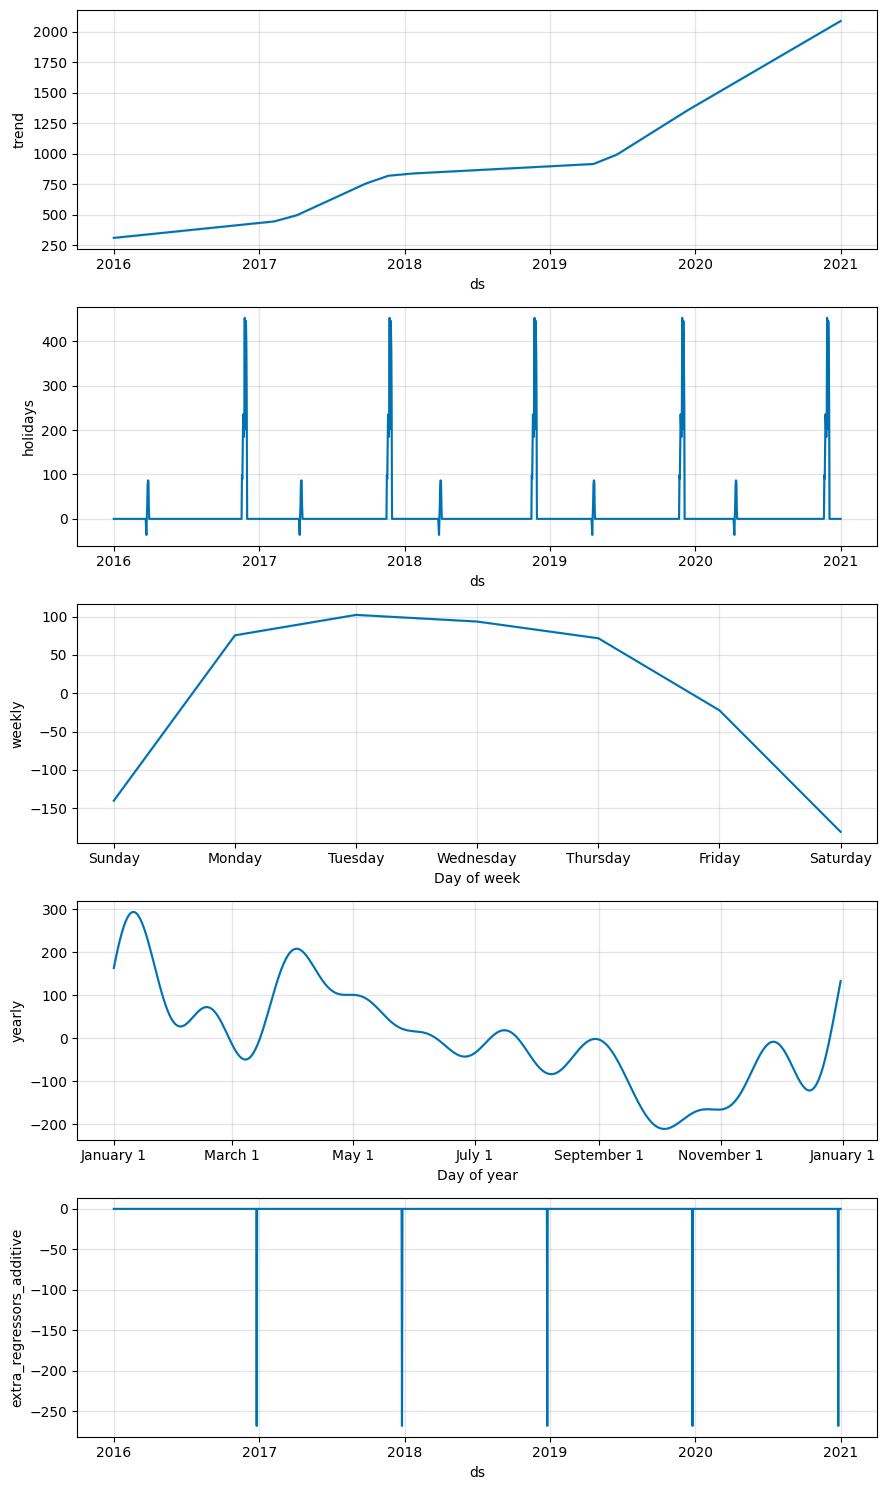

In [75]:
#Plot Components -> Structural Time Series Decomposition
m.plot_components(forecast);

#Cross Validation

In [76]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(m,
                          horizon = '31 days',
                          initial = '1450 days',
                          parallel = 'processes') #cutoffs -> for weekly of monthly data

In [78]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-26,1280.939666,1134.567258,1408.040788,1165,2019-12-25
1,2019-12-27,1222.393957,1082.818885,1346.877148,1111,2019-12-25
2,2019-12-28,1101.092345,969.399523,1236.136985,1038,2019-12-25
3,2019-12-29,1163.717292,1037.299893,1302.066876,971,2019-12-25
4,2019-12-30,1371.544284,1235.258870,1505.075590,1192,2019-12-25


In [79]:
#Cutoof -> provide the forecast for ds, y -> data actually happened, yhat -> prediction

In [81]:
#Error Assessment
#Accuracy Assessmnet
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(df_cv['y'], df_cv['yhat'])

400.03887741661765

In [82]:
np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))

518.1505972422303

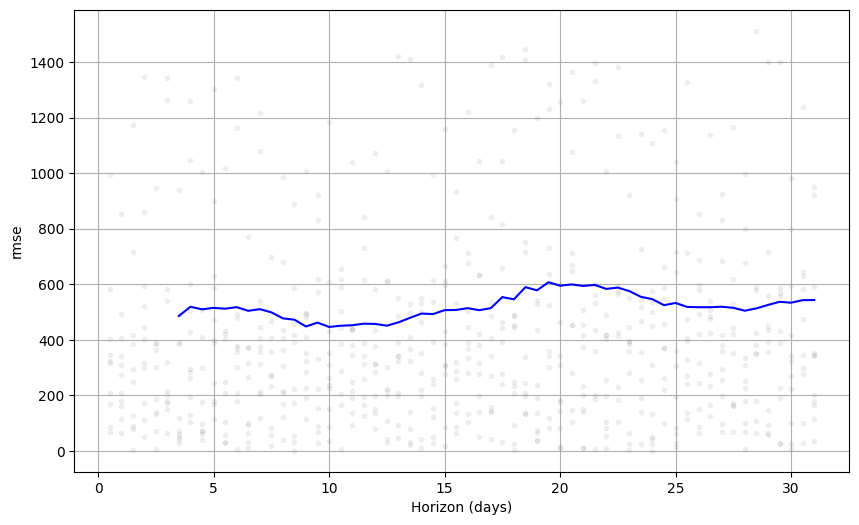

In [84]:
#CV Visualization
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,
                             metric = 'rmse');